## Streamgraph for Plain Text
The following notebook measures the frequencies of chosen words linearly through a text. The text is broken into chunks and the frequency of any number of chosen words are counted within each chunk and then displayed as a streamgraph.

### Before we begin

Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-R.ipynb](textPrep-R.ipynb) before you proceed further. The textPrepPy notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.

### Let's get started

First, we need to set our working directory (setwd). This is the folder that points to where your data is stored. In our case we have multiple folders that we may want to use at some point, but they are all contained in our Text-Analysis folder, so we will set that as our working directory.

In [1]:
#Set the working directory
setwd("~/Text-Analysis/")

#### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."


These packages are used within the steamgraph script:

- **NLP:** Natural language processing package. Provides basic classes and methods for Natural Language Processing.

- **tm:** this package provides tools (functions) for performing various types of text mining. In this notebook, we will use tm to perform text cleaning in order to have uniform data for analysis. Check out [this link](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) for the documentation!

- **ggplot2:** A system for 'declaratively' creating graphics based on "The Grammar of Graphics".

- **ggTimeSeries:** This R package offers novel time series visualisations, is based on ggplot2 and offers geoms and pre-packaged functions for easily creating various charts.
- **readtext:** Functions for importing and handling text files and formatted text files with additional meta-data, such including '.csv', '.tab', '.json', '.xml', '.html', '.pdf', '.doc', '.docx', '.xls', '.xlsx', and others.

In [2]:
#load necessary packages
library(NLP)
library(tm)
library(ggplot2)
library(ggTimeSeries)
library(readtext)


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



#### Create a corpus
First read the text in using the readtext package.

In [3]:
#Create a corpus
corpus <- readtext("data/StarTrekNextGenClean/series/277.txt")

#### Clean the corpus
Next we take steps to clean up the corpus. 
1. We convert everything to lower case so that 'Love' and 'love' will count as the same word. 
2. Since we are working with Star Trek: The Next Generation, and Picard loves to quote Shakespeare, we scan in a pre-made early modern stopword list by scaning the text in as a character object and note that you wish to separate the text by line ("\n"). 
3. We remove stopwords using the english stopwords list provided by the 'tm' package as well as the early modern stopwords list created by us at Cyber DH.
4. We remove numbers to get rid of all the Stardates mentioned in the Star Trek series. 
5. We remove punctuation 
6. We remove any whitespace that is more than a single space.

In [4]:
#Clean the corpus
corpus <- tolower(corpus)
#To change the stopword list, use other dictionaries available with the tm package
corpus <- removeWords(corpus, stopwords("SMART"))
corpus <- removeNumbers(corpus)
corpus <- removePunctuation(corpus)
corpus <- stripWhitespace(corpus)

#### Chunk the corpus
In order for the steamgraph to work on a single text, we have to break the text up into separate chunks so that we can count word frequencies in each chunk and display it in the steamgraph. We start by spliting the corpus up into individual words. Then, we chunk these words by counting and putting every 250 words in a chunk. We save these chunks as the variable text.chunks. Now your data may be better suited for larger or smaller junks. Simply change the 250 number in the second line to however many words a chunk should contain according to your data.

In [5]:
x <- unlist(strsplit(corpus, "\\s+"))
text.chunks <- split(x, seq_along(x)%/%250)

#### Convert
Now we convert the separate chunks from a 'list' class object, back into a 'SimpleCorpus' class object.

In [6]:
#Convert the corpus back to a SimpleCorpus or Corpus object
corpus.chunk <- Corpus(VectorSource(text.chunks))

#### Document Term Matrix
The next step uses the DocumentTermMatrix() function from the tm package. This function creates a matrix where each document is a row and the terms in the text make up the columns, saved here as "dtm." The rest of the matrix consists of the frequencies for each term within each document.

In [7]:
#Create matrix using DocumentTermMatrix function and saving it as "dtm"
dtm <- DocumentTermMatrix(corpus.chunk)

#### Data Frame
Now we turn our document term matrix into a data frame. This is so the steamgraph function can read it. Next, we go into our new data frame and say we are interested in the 'Terms' column and then say which words are of interest in that column. You can pick as many words as you like, but it should always be separated by a pipe (|) and always spell out the data frame's name (DF), that you are interested in one of the columns ($), the name of that column (Terms), and that you want something that exactly matches (==) your word of interest ('captain'). Now, we save the contents of each column as a separate variable to make ploting a bit easier.

In [8]:
#Turn document term matrix into a tidy data frame
DF <- data.frame(as.table(dtm), stringsAsFactors = FALSE)
df <- DF[ which(DF$Terms=='captain'|DF$Terms=='time'|DF$Terms=='anomaly'), ]
Chunks <- df$Docs
Frequency <- df$Freq
Terms <- df$Terms
head(df, 10)

,Docs,Terms,Freq
417,1,captain,7
418,2,captain,6
419,3,captain,6
420,4,captain,2
421,5,captain,2
422,6,captain,3
423,7,captain,6
424,8,captain,7
425,9,captain,4
426,10,captain,2


#### Plot and print
1. To begin, we need to adjust the width and height of the graph output or we end up getting a square shaped steamgraph which is hard to read.

2. Now we plot our steamgraph and print the visualization. First, we save the plot as 'p' and begin by calling the ggplot function. We want to run the function on the data frame we made above (df) and then we tell ggplot we are adding aesthetic elements (aes). We set the x axis to our 'Chunks' variable above, and the y axis to the 'Frequency' variable. Then we state what we are measuring with 'group=Terms' and then we say we want to color (fill) the graph based on the 'Terms' variable as well.

3. Next, we state that we are making a steamgraph.

4. Then, we want to adjust the angle of the x-tick labels so they are slanted at 45 degrees (angle = 45) and adjust their horizontal positioning so the labels are not so close to the x-tick marks (hjust = 1).

5. Now, we want the label names to be in alphanumeric order (scale_x_discrete(drop=FALSE))

6. This next line simply states what color palette we are using and ggplot2 uses the same palette as the RColorBrewer package. We have chosen 'Dark2', but feel free to adjust to your own aesthetics.

7. Lastly, we are saving a .png of the visualization to be used later. It will be saved in your working directory unless you specificy a different file path. In our case, it will save the .png file in the Text-Analysis folder. Feel free to adjust the width, height, and dpi to suit your needs.

8. Now print!

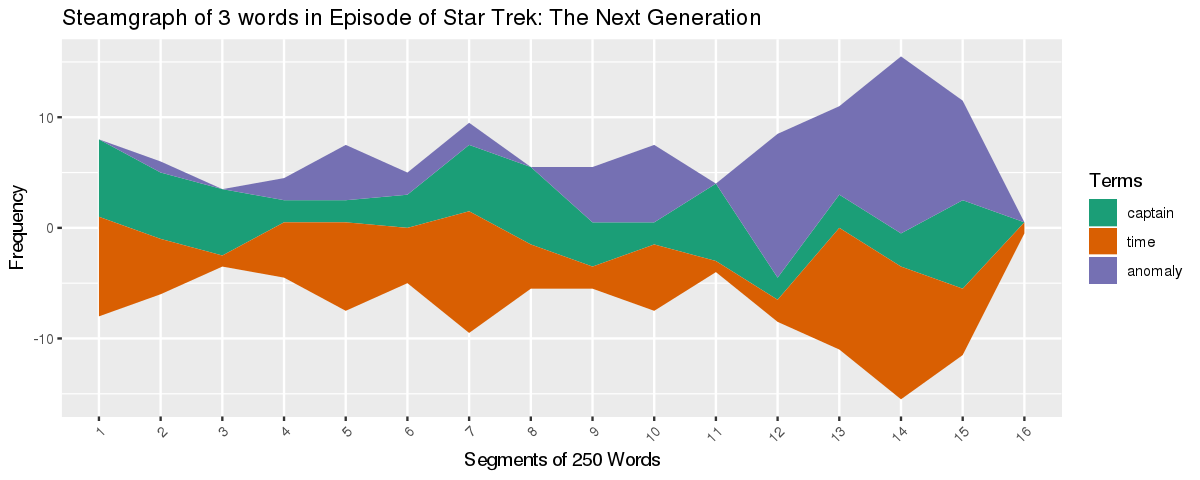

In [9]:
#Plot and print streamgraph
options(repr.plot.width=10, repr.plot.height=4)
p <- ggplot(df, aes(x=Chunks, y=Frequency, group=Terms, fill=Terms)) +
 stat_steamgraph() +
 theme(axis.text.x=element_text(angle = 45, hjust = 1)) +
 scale_x_discrete(drop=FALSE) +
 scale_fill_brewer(palette = "Dark2") +
 xlab("Segments of 250 Words") +
 ggtitle("Steamgraph of 3 words in Episode of Star Trek: The Next Generation") +
 ggsave(file="~/Text-Analysis/Output/steamgraphPlainText.png", width=8, height=4, dpi=300)
print(p)

### VOILA!